In [54]:
# Calcula la exposición al cambio climático 
# de sectores demográficos específicos.

# Importamos librerías
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
import rioxarray as rio
import geoviews as gv
import xesmf as xe

# Parámetros de mapas
gv.extension("matplotlib")
# Coloca la barra de color horizontal y abajo
def hook(plot, element):
    cax = plot.handles["cax"]
    ax = plot.handles["axis"]
    bbox = ax.get_position()
    l, b, w, h = bbox.x0, bbox.y0, bbox.width, bbox.height
    cax.set_position([l, 0.9*b, w, 0.05*h])
options = { "hooks": [hook], "ylim":(-62,85), "xlim":(-180,180),
    "colorbar": True,  "colorbar_opts": {"orientation": "horizontal"} } 
options_t = { "ylim":(-62,85), "xlim":(-180,180), "colorbar": False } 
options_c = { "hooks": [hook], "ylim":(-62,85),
    "xlim":(-180,180), "colorbar": True, "colorbar_opts":
    {"orientation": "horizontal", "format": "{:,.0f}".format } } 
options_r = { "colorbar": True, "linewidth": 0.4, "hooks": [hook],
    "colorbar_opts": {"orientation": "horizontal"},
    "cmap": "plasma_r", "ylim":(-62,85), "xlim":(-180,180) }
options_m = { "bgcolor": "lightgray", "fontscale": 2,
    "aspect": 2.25, "ylim":(-62,85), "xlim":(-180,180) }

# Parámetros de visualización de tablas
pd.options.display.float_format = "{:,.1f}".format

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
# Datos

# Códigos nacionales
ix  = "ISO_A3"

# Carpetas
path_r = "../share/Indexes/"
wb_path = "../../Bases_de_datos/CCKP_NetCDF/"

# Catálogo de datos
path_catalog = "../../Bases_de_datos/Data_catalog.csv"
df_c = pd.read_csv(path_catalog)

# Tabla base
iso = "../../Bases_de_datos/Country_ISO_code.csv"
df_iso = pd.read_csv(iso).set_index("alpha-3")
df_iso.index.name = ix

# Nombres de índices
index_n = [
    "Climate change risk index",
    "Climate change exposure index",
    "Social vulnerability index, physical climate impacts",
    "Sea level rise exposure index",
    "Drought exposure index",
    "Extreme heat exposure index",
    "Extreme rainfall exposure index",
    "Hurricane exposure index",
    "Life expectancy at birth index", "log GNI per capita, PPP index",
    "Gender Development index index", "% rural population index",
    "% population below 15 or above 65 years old index" ]
climate = index_n[1:2] + index_n[3:8]
social = index_n[2:3] + index_n[8:13]

# Índices climáticos y socioeconómicos
df_c = pd.read_csv(path_r + "climate_index.csv", index_col = ix)
df_s = pd.read_csv(path_r + "Physical_vulnerability_index.csv", index_col = ix)
df_r = pd.read_csv(path_r + "climate_risk_index.csv", index_col = ix)
df_iso[climate] = df_c[climate]
df_iso[social] = df_s[social]
df_iso[index_n[0]] = df_r[index_n[0]]
df_iso = df_iso[ df_iso[index_n[1:3]].notnull().all(axis = 1) ]

# Mapas
borders_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_admin_0_countries_mod" )
borders = gpd.read_file(borders_path).drop(
    columns = [ix] ).set_index("ISO_A3_EH")
borders.index.name = ix
borders = borders[ borders["ISO_N3_EH"] != "-99" ]
borders = borders[ ~borders.index.duplicated() ]
df_iso["ISO_N3_EH"] = borders["ISO_N3_EH"].astype(int)

# Océano
ocean_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_ocean" )
ocean = gv.Polygons( gpd.read_file(ocean_path), vdims = "min_zoom"
    ).opts( linewidth = 0, cmap = "Paired")

In [3]:
# Funciones a utilizar

# Mejora el formato de las tablas para su uso en documentos.
def display(df_iso, vn, var_i = None, p = False, format = "{:.1f}",
    category = "", type = "category", add = 1):
    # variables
    # df_iso:   dataframe que contiene los datos
    # vn:       variable principal
    # var_i:    conjunto de variables secundarias, solo si type = "index"
    # p:        indica si la variable es positiva
    # format:   formato a usar
    # category: nombre de la categoría, solo si type = "category"
    # type:     tipo de tabla a crear
    #           "index":    Resumen de variables
    #           "category": Una variable principal
    # add:      indica si sumar o promediar las columnas
    #
    # regresa
    # disp:     Objeto Display de Pandas o un Dataframe
    #           de pandas basado en la tabla de entrada

    # Países sin datos
    no_d = df_iso[ df_iso[vn].isnull() ].shape[0]
    print( f"Countries without data: {no_d} countries" )

    # Escogemos los 5 países más altos y otros más para formar la tabla
    # Resumen de variables
    if   type == "index":
        disp = df_iso.loc[ df_iso[vn].notnull(),
            ["name", vn] + var_i ].sort_values(
            vn, ascending = p ).reset_index(drop = True).head(15).copy()
    # Una variable principal
    elif type == "category":
        disp = df_iso.loc[ df_iso[vn].notnull(), ["name", vn] ].sort_values(
            vn, ascending = p ).reset_index(drop = True).head(15).copy()
    c_list = list( disp[ ["name", vn]
        ].sort_values(vn, ascending = p).head(5)["name"].values )
    print(f"Most vulnerable countries: {', '.join(c_list)}")

    # Categorías geopolíticas y geográficas
    cats = [ "", "", "", "", "", "", "SIDS", "LDC", "LLDC",
        "Asia", "Europe", "Africa", "Oceania", "Americas" ]
    # Iteramos para cada categoría geopolítica
    for r, cat in enumerate(cats[:9]):
        if r in range(0, 6): pass
        else:
            disp.iloc[r, 0] = cat
            # Resumen de variables
            if   type == "index":
                # Sumamos todo
                if add == 1: 
                    disp.iloc[r, 1:] = df_iso.loc[
                        df_iso[cat], [vn] + var_i ].sum()
                # Sumamos la población, promediamos porcentajes
                elif add == 0:
                    disp.iloc[r, 1] = df_iso.loc[
                        df_iso[cat], [vn] ].sum()
                    disp.iloc[r, 2:] = df_iso.loc[
                        df_iso[cat], var_i ].mean()
                # Promediamos todo
                elif add == -1:
                    disp.iloc[r, 1:] = df_iso.loc[
                        df_iso[cat], [vn] + var_i ].mean()
            # Una variable principal
            elif type == "category":
                # Sumamos la columna
                if add == 1:
                    disp.iloc[r, 1] = df_iso.loc[df_iso[cat], vn].sum()
                # Promediamos la columna
                elif add == 0:
                    disp.iloc[r, 1] = df_iso.loc[df_iso[cat], vn].mean()
            c_list = list( df_iso.loc[df_iso[cat], ["name", vn]
                ].sort_values( vn, ascending = p
                ).head(5)["name"].values )
            print(f"Most vulnerable {cat}: {', '.join(c_list)}")

    # Iteramos para cada categoría geográfica
    for r, cat in enumerate(cats):
        if r in range(0, 9): pass
        else:
            disp.iloc[r, 0] = cat
            # Resumen de variables
            if   type == "index":
                # Sumamos todo
                if add == 1:
                    disp.iloc[r, 1:] = df_iso.loc[
                        df_iso["region"] == cat, [vn] + var_i ].sum()
                # Sumamos la población, promediamos porcentajes
                elif add == 0:
                    disp.iloc[r, 1] = df_iso.loc[
                        df_iso["region"] == cat, [vn] ].sum()
                    disp.iloc[r, 2:] = df_iso.loc[
                        df_iso["region"] == cat, var_i ].mean()
                # Promediamos todo
                if add == -1:
                    disp.iloc[r, 1:] = df_iso.loc[
                        df_iso["region"] == cat, [vn] + var_i ].mean()
            # Una variable principal
            elif type == "category":
                # Sumamos la columna
                if add == 1:
                    disp.iloc[r, 1] = df_iso.loc[
                        df_iso["region"] == cat, vn].sum()
                # Promediamos la columna
                elif add == 0: 
                    disp.iloc[r, 2] = df_iso.loc[
                        df_iso["region"] == cat, vn].mean()

    # Total mundial
    cat = "World"
    r = 14
    disp.iloc[r, 0] = cat
    # Resumen de variables
    if   type == "index":
        # Sumamos todo
        if add == 1:
            disp.iloc[r, 1:] = df_iso[ [vn] + var_i ].sum()
        # Sumamos la población, promediamos porcentajes
        elif add == 0:
            disp.iloc[r, 1] = df_iso[ [vn] ].sum()
            disp.iloc[r, 2:] = df_iso[ var_i ].mean()
        # Promediamos todo
        elif add == -1:
            disp.iloc[r, 1:] = df_iso[ [vn] + var_i ].mean()
    # Una variable principal
    elif type == "category":
        # Sumamos la columna
        if add == 1:
            disp.iloc[r, 1] = df_iso[vn].sum()
        # Promediamos la columna
        elif add == 0:
            disp.iloc[r, 2] = df_iso[vn].sum()
    
    # Renombramos columnas
    # Resumen de variables
    if   type == "index":
        cols = ["Name", vn] + var_i
    # Una variable principal
    elif type == "category":
        cols = [ "Name", f"{category}" ]
    disp.columns = cols

    # Damos formato
    # Resumen de variables
    if   type == "index":
        # Pasamos la tabla sin formato
        pass
        # Una variable principal
    elif type == "category":
        disp = disp.style.format( { cols[1]: format } )

    # Regresamos la tabla
    return disp

In [4]:
# Archivos de zonas afectadas
files_n = [ "all", "pre", "temp", "drought", "hurr" ]
# Nombres de archivos de zonas afectadas
files = [ f"../results/hotspots/{x}_2040_2059_SSP245.tif" for x in files_n ]

clim = []
for f in files:
    clim.append( xr.open_dataset( f ).isel(band = 0).drop_vars(
        ["band", "spatial_ref"] ).rename_dims( {"x": "lon", "y": "lat"}
        ).rename_vars( {"x": "lon", "y": "lat", "band_data": "Hotspots"} ) )

In [5]:
clim[0] = clim[1] + clim[2] + clim[3] + clim[4]
clim[0] = clim[0].where(clim[0].notnull(), 0)
clim[0] = clim[0].where(clim[0] > 0, 0)
clim[0] = clim[0].where(clim[0] == 0, 1)
clim[0].max()

<xarray.Dataset> Size: 8B
Dimensions:   ()
Data variables:
    Hotspots  float64 8B 1.0

min: 0.0, max: 118209921.34559451


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Extreme climate affected poor)
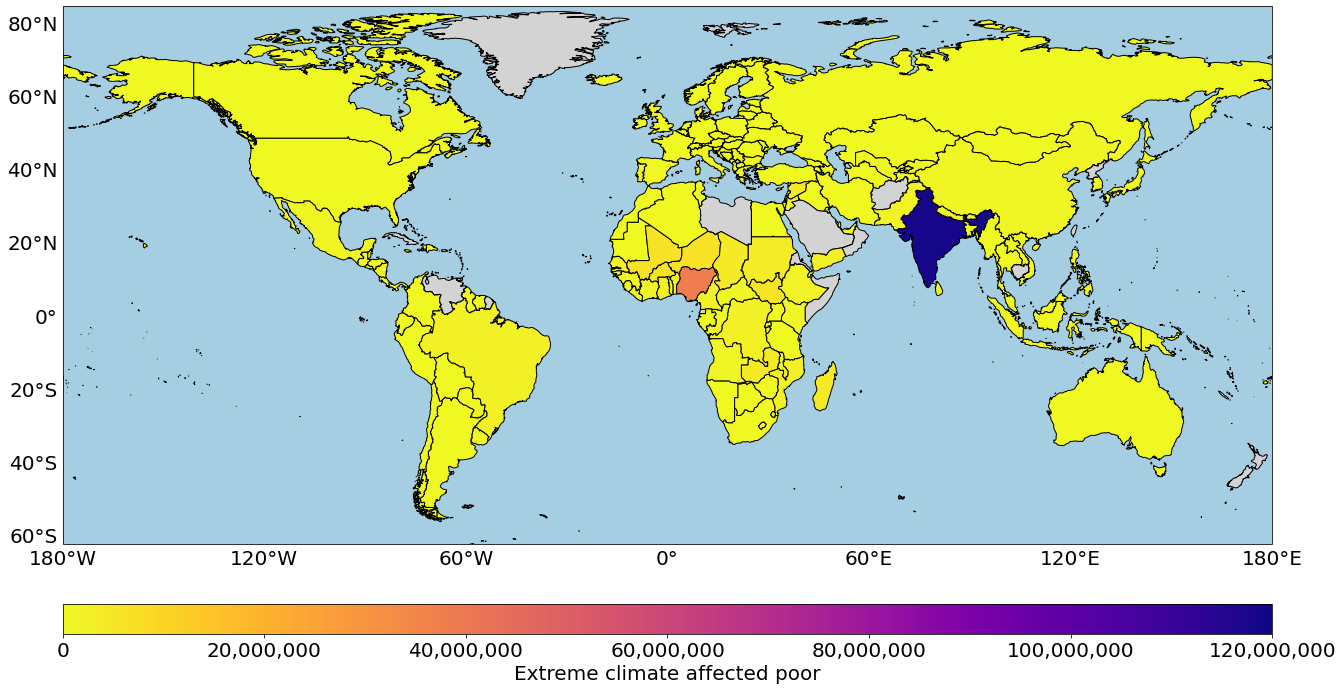

min: 0.0, max: 73.64675315811712


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (% Extreme climate affected poor)
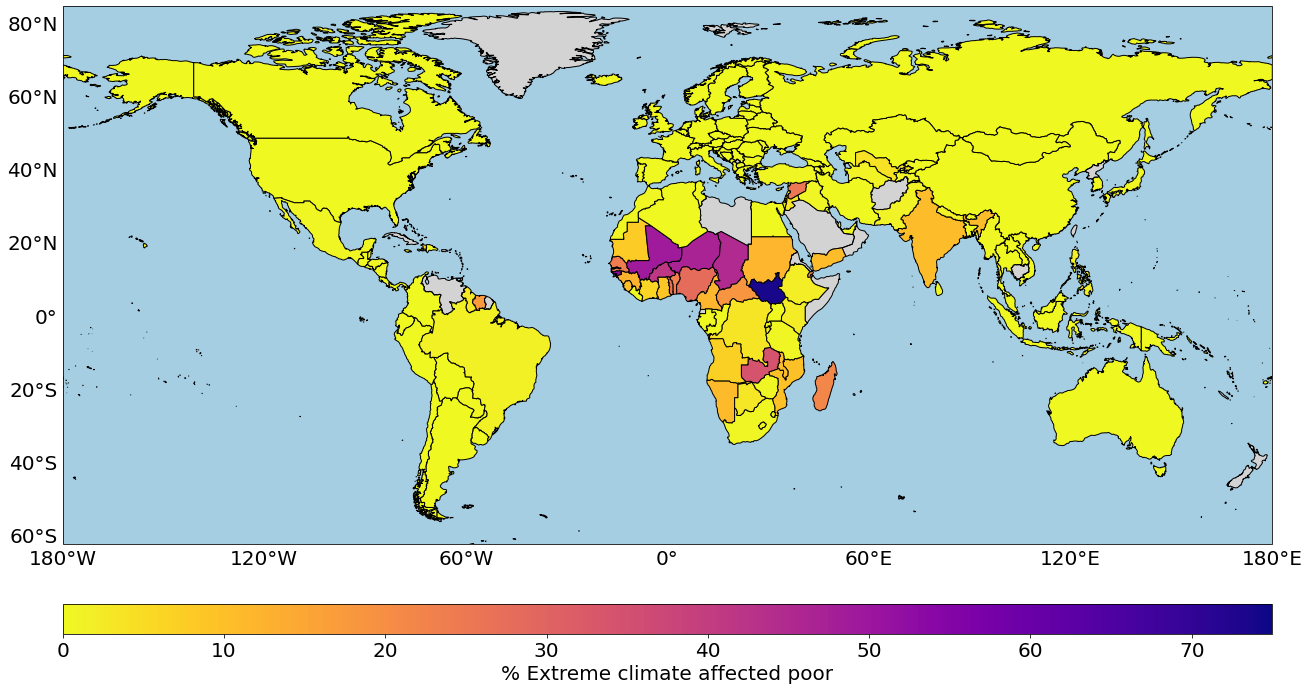

Countries without data: 11 countries
Most vulnerable countries: India, Nigeria, Mali, Niger, Burkina Faso
Most vulnerable SIDS: Guinea-Bissau, Haiti, Suriname, Jamaica, Guyana
Most vulnerable LDC: Mali, Niger, Burkina Faso, South Sudan, Chad
Most vulnerable LLDC: Mali, Niger, Burkina Faso, South Sudan, Chad


,Name,Extreme climate affected poor,Extreme rainfall affected poor,Extreme temperature affected poor,Drought affected poor,Hurricane affected poor
0,India,"118,209,921","3,904","118,206,017",0,0
1,Nigeria,"38,026,637",0,"38,026,637",0,0
2,Mali,"6,524,172",0,"6,524,172",0,0
3,Niger,"6,158,044",0,"6,158,044",0,0
4,Burkina Faso,"5,817,307",0,"5,817,307",0,0
5,South Sudan,"5,366,168",0,"5,366,168",0,0
6,SIDS,"1,418,879","2,564","721,061","221,340","473,915"
7,LDC,"56,915,093","505,013","45,965,013","10,014,021","431,045"
8,LLDC,"37,460,167","2,305","32,216,621","5,241,241",0
9,Asia,"132,577,910","700,228","126,301,102","2,588,351","2,988,229"


In [44]:
# Población en pobreza extrema afectada

# Datos de población
path_pop = "../share/Population/"
pop = xr.open_dataset(path_pop + "population_1995_2014.nc")

# Población en pobreza extrema
pov_n = "pov190"
path_pov = ( "../../Bases_de_datos/CCKP_NetCDF/"
    + f"climatology-{pov_n}-annual-mean"
    + "_pop-x0.25_gsap-2-historical_climatology_mean_1995-2014.nc" )
pov = xr.open_dataset(path_pov).isel(time = 0).drop_vars(
    ["lon_bnds", "lat_bnds", "time", "bnds"] )
p = list(pov.keys())[0]

# Variables de población afectada
vars    = [ "Extreme climate", "Extreme rainfall",
            "Extreme temperature", "Drought", "Hurricane" ]
vars_p  = [ f"{v} affected poor" for v in vars ]
vars_pp = [ f"% {v} affected poor" for v in vars ]
path_n = "../share/Climate/"

# Iteramos para cada categoría climática
df_iso = df_iso.reset_index().set_index("ISO_N3_EH")
for i, v in enumerate(vars):

    # Población expuesta
    pop[vars_p[i]] = clim[i]["Hotspots"] * pov[p] * pop["population"] / 100
    df_p = pop.to_dataframe().reset_index(
        drop = True ).groupby("country").sum()
    df_p[vars_pp[i]] = 100 * df_p[vars_p[i]] / df_p["population"]

    # Asignamos por código numérico de país
    df_p.index = df_p.index.astype(int)
    df_iso[ [vars_p[i], vars_pp[i]] ] = df_p[ [vars_p[i], vars_pp[i]] ]
    
df_iso = df_iso.reset_index().set_index(ix)
df_iso.loc[ ["VEN", "CUB", "SAU", "OMN", "SOM", "LBY", "ERI",
    "GNQ", "AFG", "KHM", "NZL"], vars_p + vars_pp ] = np.nan

# Mapas
# Población en pobreza extrema afectada
#vn = "Population in extreme poverty affected by extreme climate events"
vn = vars_p[0]
borders[vn] = df_iso[vn]
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
#print(borders[vn].sort_values().dropna().to_string())
min = 0
max = 1.2e8
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options_c )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )
# % de población total en pobreza extrema afectada
#vn = "Population in extreme poverty affected by extreme climate events"
vn = vars_pp[0]
borders[vn] = df_iso[vn]
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
#print(borders[vn].sort_values().dropna().to_string())
min = 0
max = 75
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países más vulnerables
disp = display( df_iso, vars_p[0], vars_p[1:],
    type = "index", format = "{:,.0f}" )
cols = ["Name"] + vars_p
disp = disp[cols]
disp = disp.style.format(
    dict(zip(cols[1:], ["{:,.0f}"] * len(cols[1:]))) )
disp

min: 68.0, max: 8000000.0


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Homeless population)
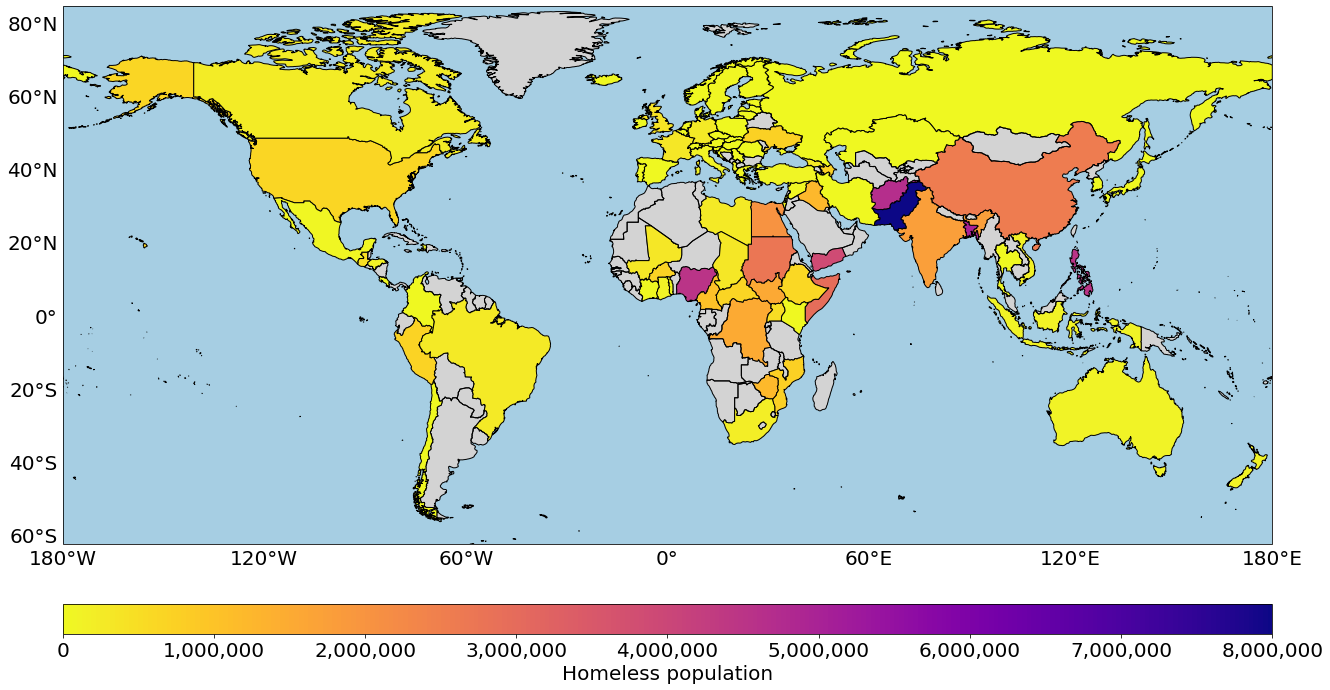

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Homeless population)
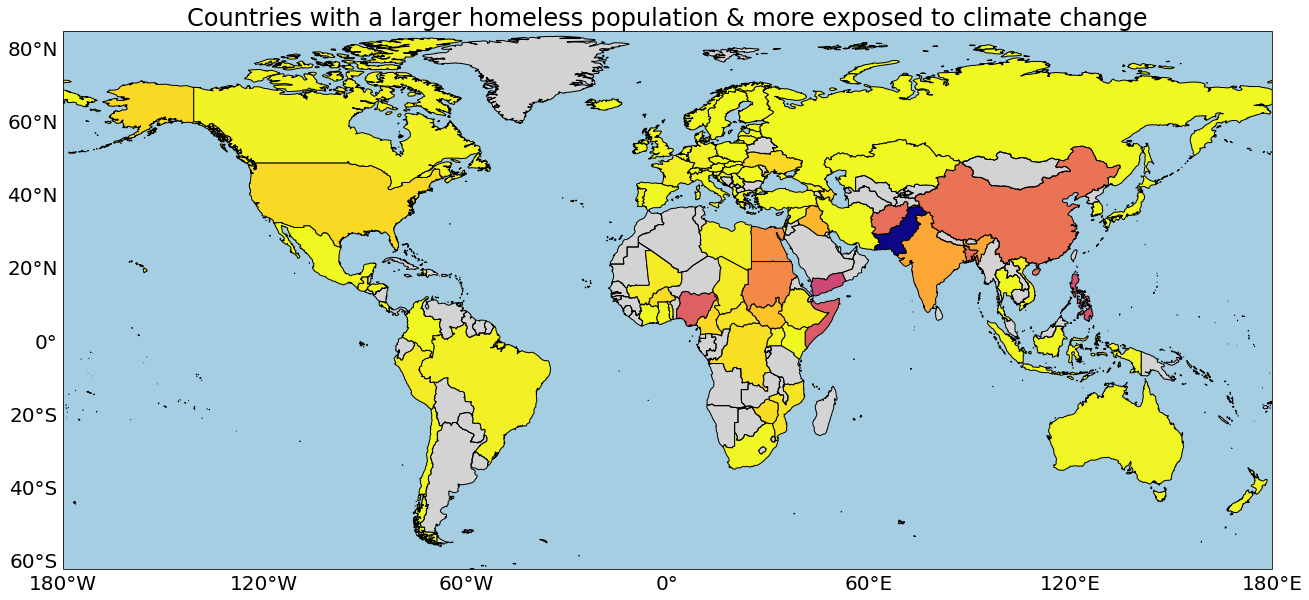

Countries without data: 103 countries
Most vulnerable countries: Pakistan, Bangladesh, Afghanistan, Philippines, Nigeria
Most vulnerable SIDS: Haiti, Singapore, Grenada, Antigua and Barbuda, Bahamas
Most vulnerable LDC: Bangladesh, Afghanistan, Yemen, Somalia, Sudan
Most vulnerable LLDC: Afghanistan, South Sudan, Zimbabwe, Azerbaijan, Burkina Faso


,Name,Homeless population,Climate change risk index,Climate change exposure index,"Social vulnerability index, physical climate impacts"
0,Pakistan,"8,000,000",Highly at risk,Highly exposed,Highly vulnerable
1,Bangladesh,"5,000,000",At risk,Exposed,Very vulnerable
2,Afghanistan,"4,660,000",Very at risk,Very exposed,Extremely vulnerable
3,Philippines,"4,500,000",Very at risk,Very exposed,Very vulnerable
4,Nigeria,"4,500,000",Very at risk,Very exposed,Highly vulnerable
5,Yemen,"3,858,000",Extremely at risk,Highly exposed,Highly vulnerable
6,SIDS,"38,971",At risk,Exposed,Very vulnerable
7,LDC,"26,241,447",Very at risk,Very exposed,Highly vulnerable
8,LLDC,"11,304,080",Very at risk,Exposed,Very vulnerable
9,Asia,"33,068,422",At risk,Very exposed,Vulnerable


In [58]:
# Población sin hogar afectada

# Datos de población sin hogar
path_homeless = ( "../../Bases_de_datos/World_population_review/"
    + "Homelessness.csv" )
homeless = pd.read_csv(path_homeless).set_index(ix)
df_iso["Homeless population"] = homeless["Homeless population"]

# Mapas
# Población sin hogar afectada
vn = "Homeless population"
borders[vn] = df_iso[vn]
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
#print(borders[vn].sort_values().dropna().to_string())
min = 0
max = 8e6
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options_c )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )
# Población sin hogar afectada * índice climático
vn = "Homeless population"
borders[vn] = df_iso[vn] * df_iso[climate] / 10
#print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
#print(borders[vn].sort_values().dropna().to_string())
min = borders[vn].min()
max = borders[vn].max()
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", title = "Countries with a larger homeless "
    + "population & more exposed to climate change", **options_t )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países más vulnerables
# Damos formato
disp = display( df_iso, "Homeless population", index_n[0:3],
    type = "index", format = "{:,.0f}", add = 0 )

# Ponemos índices de manera categórica
verbal = disp.copy()
risk = index_n[0]
cat_name = ["vulnerable", "exposed", "at risk"]
cat_name_2 = ["vulnerability", "exposure", "risk"]
social = index_n[2]
climate = index_n[1]
for i, c in enumerate([social, climate, risk]):
    verbal[c] = verbal[c].where(
        (disp[c]<9), f"Extremely {cat_name[i]}" )
    verbal[c] = verbal[c].where(
        (disp[c]>=9  ) | (disp[c]<7.5), f"Highly {cat_name[i]}" )
    verbal[c] = verbal[c].where(
        (disp[c]>=7.5) | (disp[c]<5  ), f"Very {cat_name[i]}" )
    verbal[c] = verbal[c].where(
        (disp[c]>=5  ) | (disp[c]<2.5  ), f"{str.capitalize(cat_name[i])}" )
    verbal[c] = verbal[c].where(
        (disp[c]>=2.5  ) | (disp[c]<0  ), f"Low {cat_name_2[i]}" )
    verbal[c] = verbal[c].where(
        (disp[c]>0), f"Not {cat_name[i]}" )
cols = ( ["Name", "Homeless population"] + index_n[0:3]
#    + ["Sea level rise", "Drought", "Extreme heat",
#    "Extreme rainfall", "Hurricanes" ]
    )
verbal.columns = cols
disp = verbal.style.format( {cols[1]: "{:,.0f}"} )
disp

min: 0.0, max: 36.0


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Unemployment rate)
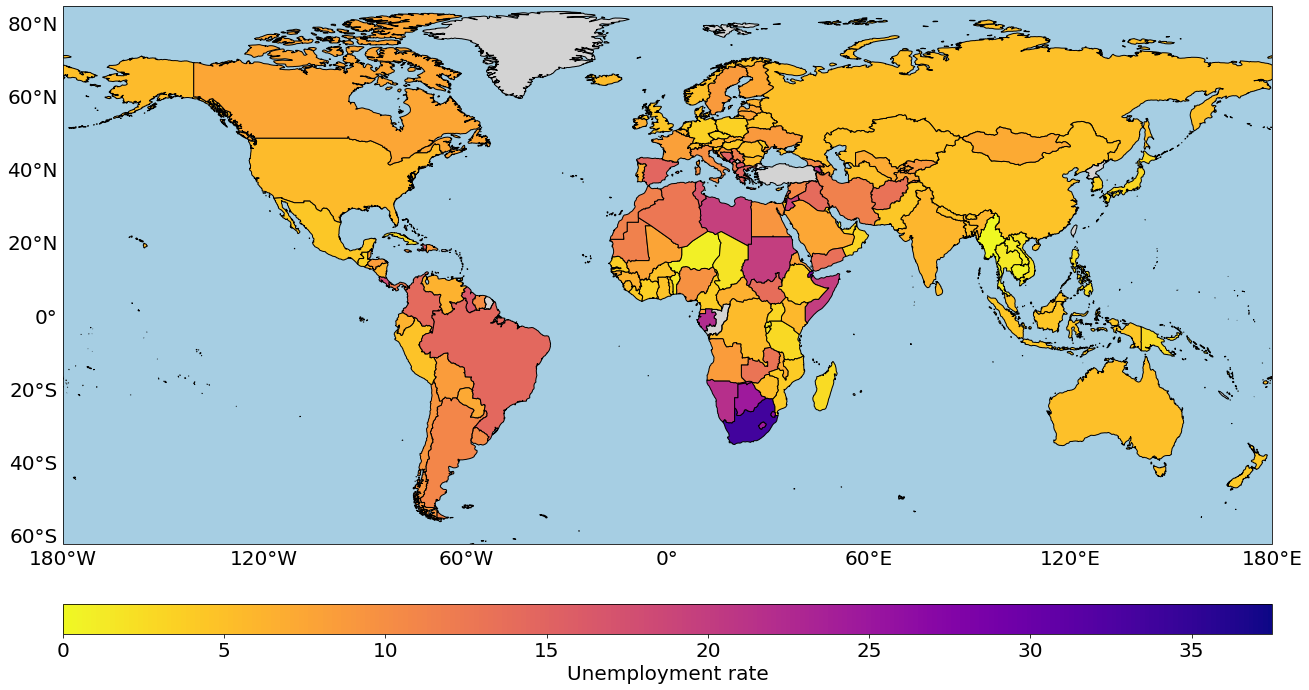

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Unemployment rate)
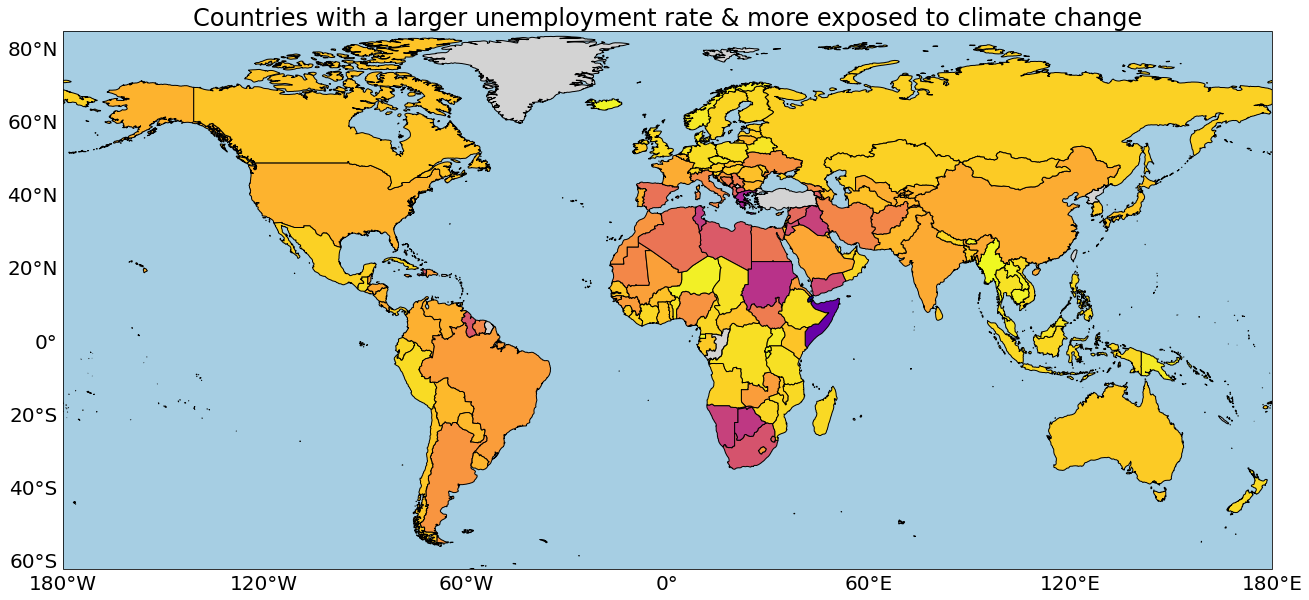

Countries without data: 2 countries
Most vulnerable countries: Marshall Islands, South Africa, Kiribati, Djibouti, Eswatini
Most vulnerable SIDS: Marshall Islands, Kiribati, Grenada, Dominica, Nauru
Most vulnerable LDC: Kiribati, Djibouti, Lesotho, Somalia, Sudan
Most vulnerable LLDC: Eswatini, Botswana, Lesotho, Armenia, North Macedonia


,Name,Unemployment rate,Climate change risk index,Climate change exposure index,"Social vulnerability index, physical climate impacts"
0,Marshall Islands,36.0,At risk,Low exposure,Very vulnerable
1,South Africa,33.6,At risk,Exposed,Vulnerable
2,Kiribati,30.6,Very at risk,Exposed,Highly vulnerable
3,Djibouti,28.4,Very at risk,Highly exposed,Very vulnerable
4,Eswatini,25.8,Very at risk,Exposed,Very vulnerable
5,"Palestine, State of",24.9,Very at risk,Very exposed,Very vulnerable
6,SIDS,11.0,At risk,Exposed,Very vulnerable
7,LDC,8.1,Very at risk,Very exposed,Highly vulnerable
8,LLDC,8.6,Very at risk,Exposed,Very vulnerable
9,Asia,6.8,At risk,Very exposed,Vulnerable


In [57]:
# Población desempleada afectada
path_unemploy= ( "../../Bases_de_datos/World_population_review/"
    + "Unemployment_rate.csv" )
unemploy = pd.read_csv(path_unemploy).set_index(ix)
unemploy["Rate (CIA)"] = unemploy[ "Rate (CIA)"
    ].apply(lambda x: x[:-1]).astype(float)
df_iso["Unemployment rate"] = unemploy["Rate (CIA)"]

# Guardamos el archivo
df_iso[vars_p + vars_pp + ["Homeless population", "Unemployment rate"]
    ].to_csv("../share/Indexes/extreme_poor.csv")

# Mapas
# Población desempleada afectada
vn = "Unemployment rate"
borders[vn] = df_iso[vn]
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
#print(borders[vn].sort_values().dropna().to_string())
min = 0
max = 37.5
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )
# Población desempleada afectada * índice climático
vn = "Unemployment rate"
borders[vn] = df_iso[vn] * df_iso[climate] / 10
#print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
#print(borders[vn].sort_values().dropna().to_string())
min = borders[vn].min()
max = borders[vn].max()
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", title = "Countries with a larger unemployment "
    + "rate & more exposed to climate change", **options_t )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países más vulnerables
# Damos formato
disp = display( df_iso, "Unemployment rate", index_n[0:3], 
    type = "index", format = "{:,.0f}", add = -1 )

# Ponemos índices de manera categórica
verbal = disp.copy()
risk = index_n[0]
cat_name = ["vulnerable", "exposed", "at risk"]
cat_name_2 = ["vulnerability", "exposure", "risk"]
social = index_n[2]
climate = index_n[1]
for i, c in enumerate([social, climate, risk]):
    verbal[c] = verbal[c].where(
        (disp[c]<9), f"Extremely {cat_name[i]}" )
    verbal[c] = verbal[c].where(
        (disp[c]>=9  ) | (disp[c]<7.5), f"Highly {cat_name[i]}" )
    verbal[c] = verbal[c].where(
        (disp[c]>=7.5) | (disp[c]<5  ), f"Very {cat_name[i]}" )
    verbal[c] = verbal[c].where(
        (disp[c]>=5  ) | (disp[c]<2.5  ), f"{str.capitalize(cat_name[i])}" )
    verbal[c] = verbal[c].where(
        (disp[c]>=2.5  ) | (disp[c]<0  ), f"Low {cat_name_2[i]}" )
    verbal[c] = verbal[c].where(
        (disp[c]>0), f"Not {cat_name[i]}" )
cols = ( ["Name", "Unemployment rate"] + index_n[0:3]
#    + ["Sea level rise", "Drought", "Extreme heat",
#    "Extreme rainfall", "Hurricanes" ]
    )
verbal.columns = cols
disp = verbal.style.format( {cols[1]: "{:,.1f}"} )
disp

min: 1229.0, max: 125332335.0


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Indigenous Population)
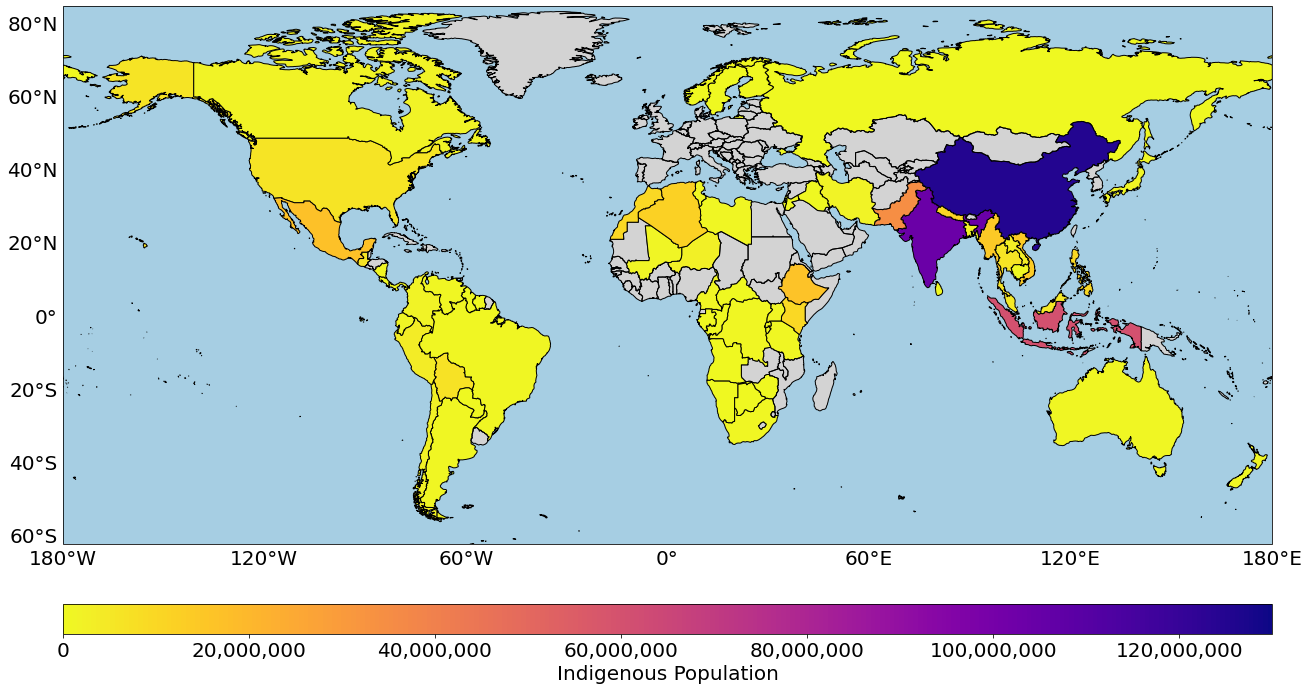

min: 0.0056368389671146175, max: 60.80030573868029


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (% Indigenous Population)
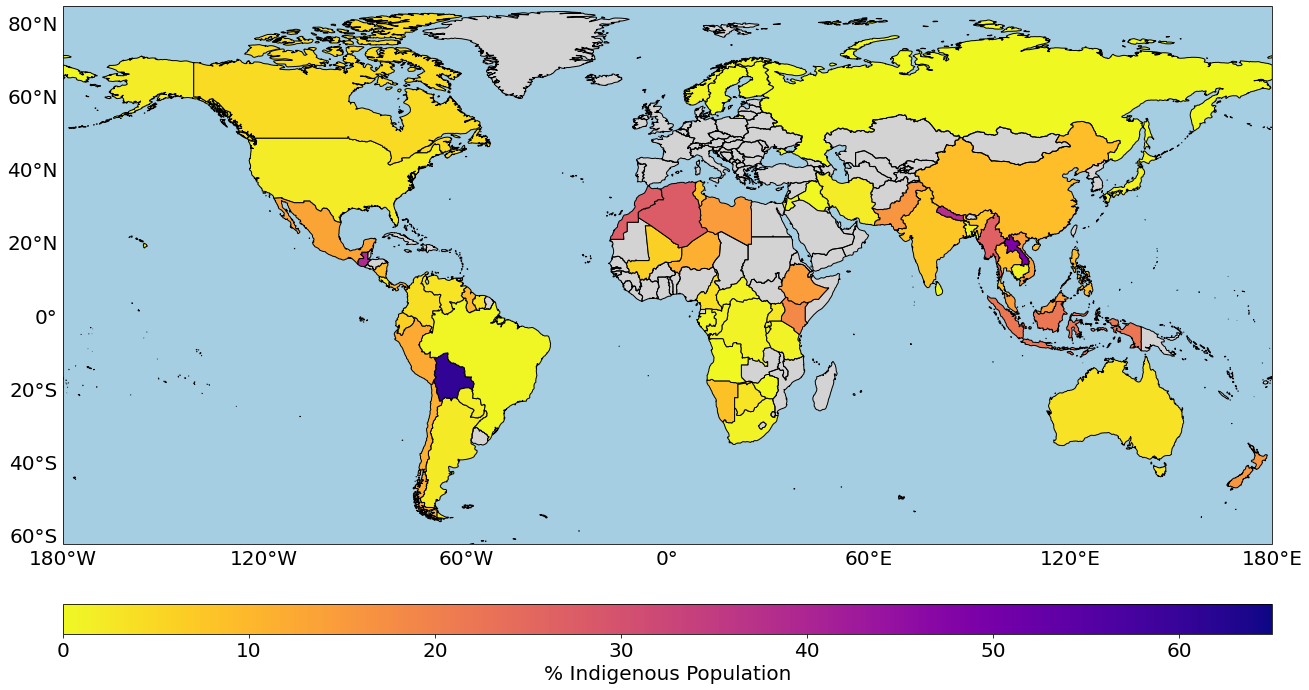

min: 0.00272849885643703, max: 25.49256890289727


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (% Indigenous Population)
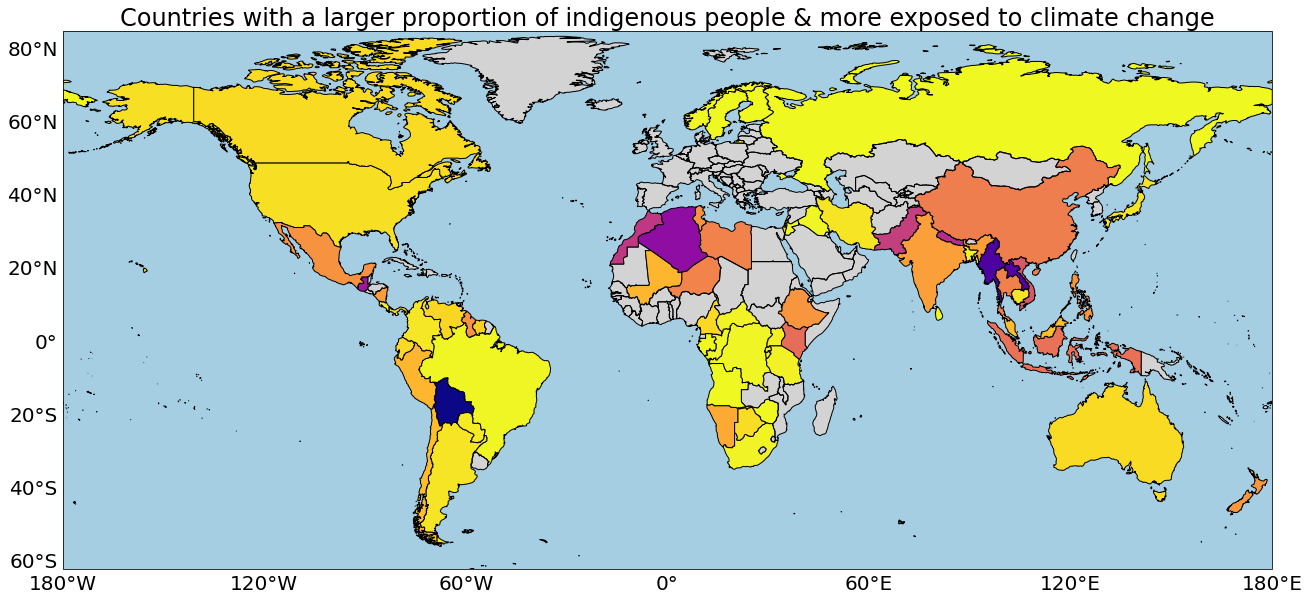

Countries without data: 128 countries
Most vulnerable countries: China, India, Indonesia, Pakistan, Mexico
Most vulnerable SIDS: Guyana, Suriname, Antigua and Barbuda, Bahamas, Barbados
Most vulnerable LDC: Ethiopia, Myanmar, Nepal, Lao People's Democratic Republic, Niger
Most vulnerable LLDC: Ethiopia, Nepal, Bolivia (Plurinational State of), Lao People's Democratic Republic, Niger


,Name,Indigenous Population,Climate change risk index,Climate change exposure index,"Social vulnerability index, physical climate impacts"
0,China,"125,332,335",Very at risk,Highly exposed,Vulnerable
1,India,"104,000,000",Very at risk,Very exposed,Very vulnerable
2,Indonesia,"60,000,000",At risk,Exposed,Very vulnerable
3,Pakistan,"35,000,000",Highly at risk,Highly exposed,Highly vulnerable
4,Mexico,"16,933,283",At risk,Exposed,Vulnerable
5,Ethiopia,"16,500,000",Very at risk,Exposed,Highly vulnerable
6,SIDS,"98,844",Extremely at risk,Extremely exposed,Extremely vulnerable
7,LDC,"53,527,296",Extremely at risk,Extremely exposed,Extremely vulnerable
8,LLDC,"43,242,703",Extremely at risk,Extremely exposed,Extremely vulnerable
9,Asia,"393,246,705",Extremely at risk,Extremely exposed,Extremely vulnerable


In [55]:
# Población indígena afectada
path_unemploy= ( "../../Bases_de_datos/IWGIA/ind_pop.csv" )
indigenous = pd.read_csv(path_unemploy, thousands = ",").set_index(ix)
df_iso["Indigenous Population"] = indigenous["Indigenous Population"]
df_iso.loc["NAM", "Indigenous Population"] = 214255
df_iso["Population"] = borders["POP_EST"]
df_iso["% Indigenous Population"] = ( df_iso["Indigenous Population"]
    * 100 / df_iso["Population"] )

# Guardamos el archivo
df_iso[vars_p + vars_pp + [ "Homeless population", "Unemployment rate",
    "Indigenous Population", "% Indigenous Population" ]
    ].to_csv("../share/Indexes/extreme_poor.csv")

# Mapas
# Mapas
# Población indígena afectada
vn = "Indigenous Population"
borders[vn] = df_iso[vn]
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
#print(borders[vn].sort_values().dropna().to_string())
min = 0
max = 1.3e8
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options_c )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )
# % Población indígena afectada
vn = "% Indigenous Population"
borders[vn] = df_iso[vn]
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
#print(borders[vn].sort_values().dropna().to_string())
min = 0
max = 65
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )
# % Población indígena afectada * índice climático
vn = "% Indigenous Population"
borders[vn] = df_iso[vn] * df_iso[climate] / 10
#print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
#print(borders[vn].sort_values().dropna().to_string())
min = borders[vn].min()
max = borders[vn].max()
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", title = "Countries with a larger proportion of "
    + "indigenous people & more exposed to climate change", **options_t )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países más vulnerables
# Damos formato
disp = display( df_iso, "Indigenous Population", index_n[0:3],
    type = "index", format = "{:,.0f}", add = 1 )

# Ponemos índices de manera categórica
verbal = disp.copy()
risk = index_n[0]
cat_name = ["vulnerable", "exposed", "at risk"]
cat_name_2 = ["vulnerability", "exposure", "risk"]
social = index_n[2]
climate = index_n[1]
for i, c in enumerate([social, climate, risk]):
    verbal[c] = verbal[c].where(
        (disp[c]<9), f"Extremely {cat_name[i]}" )
    verbal[c] = verbal[c].where(
        (disp[c]>=9  ) | (disp[c]<7.5), f"Highly {cat_name[i]}" )
    verbal[c] = verbal[c].where(
        (disp[c]>=7.5) | (disp[c]<5  ), f"Very {cat_name[i]}" )
    verbal[c] = verbal[c].where(
        (disp[c]>=5  ) | (disp[c]<2.5  ), f"{str.capitalize(cat_name[i])}" )
    verbal[c] = verbal[c].where(
        (disp[c]>=2.5  ) | (disp[c]<0  ), f"Low {cat_name_2[i]}" )
    verbal[c] = verbal[c].where(
        (disp[c]>0), f"Not {cat_name[i]}" )
cols = ( ["Name", "Indigenous Population"] + index_n[0:3]
#    + ["Sea level rise", "Drought", "Extreme heat",
#    "Extreme rainfall", "Hurricanes" ]
    )
verbal.columns = cols
disp = verbal.style.format( {cols[1]: "{:,.0f}"} )
disp

In [12]:
# Información para un país específico
country = ["VNM", "THA", "ARE", "IDN", "SAU", "TUR"]

# Resumen
print( df_iso.loc[ country, vars_p + 
    ["Homeless population", "Unemployment rate", "Indigenous Population"]
    ].T.iloc[-11:].sum(axis = 1).to_string() )
# Detalle
# df_iso.loc[country].T.iloc[-11:] * 100

Extreme rainfall affected poor          27,182.4
Extreme temperature affected poor      389,766.6
Drought affected poor                  418,698.5
Hurricane affected poor                102,100.8
Homeless population                    356,700.0
Unemployment rate                           18.7
Indigenous Population               80,200,000.0
